
Write out the Bethe formula in Markup and below it, list and define the terms in the formula.

In [3]:
import math


K= 4πN_Ar_e^2m_ec^2= 0.307 075 MeV mol−1 cm-1

z - charge number of incident particle = +

Z - atomic number of absorber = 29

A - atomic mass of absorber = 63.546amu

B - v/c

m_e *c^2 - 0.510 998 928(11) MeV

$\gamma$- 1/sqrt(1-B^2)

W_max - energy transfer to an electron MeV in a single collision

I - mean excitation energy eV = 290

delta(beta gamma) - δ(βγ) density effect correction to ionization energy loss

$$\frac{-dE}{dx}= K*z^2*Z/(A*B)*[.5ln[2m_ec^2B^2 \gamma ^2W_max/I^2]-B^2-.5*delta]$$

$$ \frac{-dE}{dx}= \frac{4*\pi nz^2}{m_ec^2*\beta^2}*   (\frac {e^2}{4 \pi \epsilon_0}^2)*[ln[\frac {2m_ec^2B^2}{I*(1-\beta^2)}]-\beta^2] $$

Write a function that takes in the mass of the traversing particle, info about the material it's traversing, and the energy of the traversing particle(as a numpy array), and return the energy lost per some distance for that particle.

In [4]:
import numpy as np

def bethe(m,b,z,Zm,Am,rho):
    restenergy= .511
    e_0=8.854*10**-12
    I=Zm*10**-5
    n=((6.022*10**23)*Zm*Am*rho/(Am))

    chunk1=(4*3.14*n*z**2)/(restenergy*(b**2))
    #return chunk1

    chunk2=((2.567*10**-38/(4*3.14*8.854*10**-12))**2)
    #return chunk2   

    chunk3=math.log((2*restenergy*b**2)/(I*(1-b**2)))-b**2
    #return chunk3

    DEDX= (chunk1*chunk2*chunk3)
    return DEDX
    
    
def EtoB(m,i):
    b=(1-(m/i)**2)**(0.5)
    return b
    

In [5]:
b=EtoB(.511,1)
print b

chunk2=bethe(.511,.859,1,10,18,1030)
#print DEDX
print chunk2
#print chunk2
#print chunk3

0.859580711743
1.04908450592e-25


In [6]:
electron=[]
muon=[]
kaon=[]
proton=[]
energies=[1,10,100,1000,10000,10000,1000000]
particlemass=[.511,105.7,497.6,938.3]
for j in particlemass:
    for i in energies:
        if i>j:
            b=EtoB(j,i)
            DEDX=bethe(j,b,1,10,18,1030)
            if j==.511:
                electron.append(DEDX)
            if j==105.7:
                muon.append(DEDX)
            if j==497.6:
                kaon.append(DEDX)
            if j==938.3:
                proton.append(DEDX)
                

    

In [7]:
electron



[1.0481257881673966e-25,
 1.1549232172400949e-25,
 1.526045971749404e-25,
 1.9001049955887848e-25,
 2.274202876985391e-25,
 2.274202876985391e-25,
 3.0223985521454534e-25]

In [8]:
muon

[1.045497771547471e-25,
 1.408077758995318e-25,
 1.408077758995318e-25,
 2.156117217719783e-25]

In [9]:
kaon

[1.0355342453313754e-25,
 1.159094776565389e-25,
 1.159094776565389e-25,
 1.9044222638690945e-25]

In [10]:
proton

[4.833740515481463e-25,
 1.0625267910801373e-25,
 1.0625267910801373e-25,
 1.80137373665472e-25]

ValueError: x and y must have same first dimension

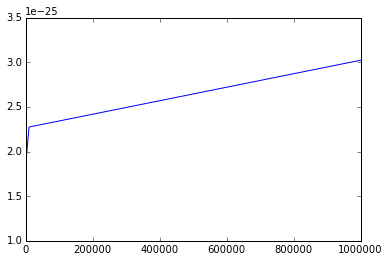

In [11]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(energies,electron,'b-',markersize=6,label='Electron')
plt.plot(energies,muon,'r-',markersize=6,label='Muon')
plt.plot(energies,kaon,'k-',markersize=6,label='Kaon')
plt.plot(energies,proton,'m-',markersize=6,label='Proton')

# Add labels with a bigger font than the default.
plt.xlabel('Momentum in MeV',fontsize=14)
plt.ylabel('Beta',fontsize=14)

# Change the plotting range for the xlimits (xlim) and ylimits (ylim).
#plt.xlim(-3,1100)
#plt.ylim(-1,1.5)

# Add a title
plt.title("beta vs. Momentum")

# Add a legend.
plt.legend()